# K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It is a simple and versatile algorithm that can be used for both types of problems.

**The Basic Idea**

* For a given data point, KNN looks at the 'k' nearest data points in the feature space. 
* The class or value of the data point is then determined by a majority vote or averaging among its k nearest neighbors.

**Algorithm Steps**

* Calculate the distance between the query point and all the points in the dataset. Common distance metrics include Euclidean distance, Manhattan distance, or Minkowski distance.
* Identify the 'k' nearest neighbors based on the calculated distances.
* For classification problems, assign the class label that is most frequent among the 'k' neighbors. For regression problems, calculate the average or weighted average of the target values.

**Choosing the Value of K**

* The choice of the parameter 'k' is crucial. A smaller 'k' makes the model more sensitive to noise, while a larger 'k' may lead to a smoother decision boundary but could miss local patterns.
* The optimal value for 'k' often involves experimenting and cross-validation.

**Feature Scaling**

* KNN is sensitive to the scale of features, so it's a good practice to normalize or standardize the features before applying KNN.

**Pros and Cons**

* Pros: Simple, easy to understand, and doesn't make strong assumptions about the underlying data distribution.
* Cons: Computationally expensive, especially with large datasets, and sensitive to irrelevant or redundant features.

**Use Cases**

* KNN is often used for pattern recognition, image recognition, and recommendation systems.
* It is more suitable for smaller datasets due to its computational intensity.

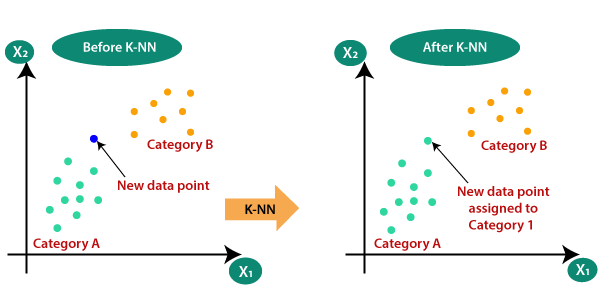

To exemplify this idea, let's import the specified libraries, retrieve the penguin dataset using Seaborn, and create a plot comparing Bill Length and Bill Depth.

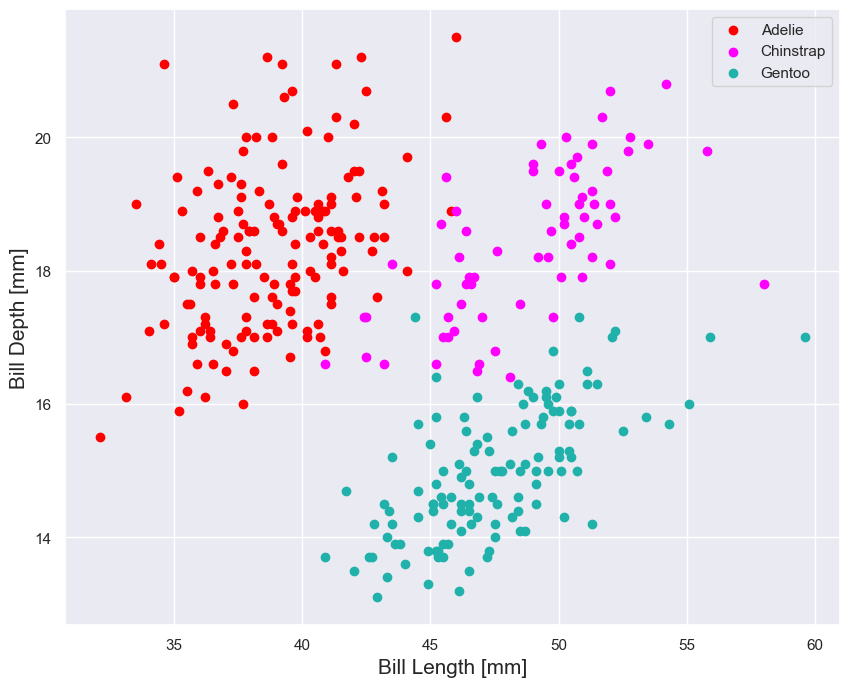

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set theme for plotting
sns.set_theme()

# Import the data
penguins = sns.load_dataset("penguins")

# Plot the data
species_colors = {"Adelie": "red", "Chinstrap": "magenta", "Gentoo": "lightseagreen"}

fig, ax = plt.subplots(figsize=(10, 8))
for species, color in species_colors.items():
    temp_df = penguins[penguins.species == species]
    ax.scatter(
        temp_df.bill_length_mm,
        temp_df.bill_depth_mm,
        c=color,
        label=species,
    )

ax.set_xlabel("Bill Length [mm]", fontsize=15)
ax.set_ylabel("Bill Depth [mm]", fontsize=15)
ax.legend()
plt.show()

In the provided visualization, it's evident that comparable data points tend to cluster together. The effectiveness of the KNN algorithm relies on the validity of this assumption, where proximity or closeness signifies similarity. KNN embodies the concept of similarity, often referred to as distance, by utilizing mathematical principles familiar from our early education—specifically, calculating distances between points on a graph.

## The K-Nearest Neighbors Algorithm

1. Data Loading:
    - Load the dataset containing examples with features and corresponding labels.
2. Initialization:
    - Choose a suitable value for K, representing the number of neighbors to consider.
3. Distance Calculation:
    - For each example in the dataset:
        - Compute the distance between the query example and the current example in the dataset.
        - Store the calculated distance along with the index of the current example in an ordered collection.
4. Sorting:
    - Arrange the collection of distances and indices in ascending order based on the distances.
5. Selection:
    - Choose the first K entries from the sorted collection.
6. Label Extraction:
    - Retrieve the labels associated with the selected K entries.
7. Regression Outcome:
    - If the task is regression, calculate and return the mean of the K labels.
8. Classification Outcome:
    - If the task is classification, determine and return the mode (most frequent label) among the K labels.
    
Prior to applying this algorithm, we generate a training set and a testing set using the following code.

In [36]:
from sklearn.model_selection import train_test_split

# Load the penguin dataset
penguins = sns.load_dataset("penguins")

# Features (X) and labels (y)
X = penguins[["bill_length_mm", "bill_depth_mm"]].to_numpy()
y = penguins["species"].to_numpy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=1
)

As our metric for measuring distance, we will opt for the Euclidean distance, which is articulated by the following equation:

$$
d(p,q) = \sqrt{(p-q)^T(p-q)}
$$

In [37]:
# Define a custom distance function
def euclidean_distance(point, feature):
    return np.sqrt(np.sum((point - feature) ** 2))

# Example usage of the distance function
print(f"The distance between point 35 and 78 is {distance(X[35], X[78])}")

The distance between point 35 and 78 is 5.830951894845301


Having established our distance function, we can proceed to create a function that calculates the k-nearest neighbors for a given point. The implementation is provided in the following code cell.

In [38]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    """
    Finds the k-nearest neighbors for a given point in a dataset.

    Parameters:
    - point (numpy.ndarray): The query point for which neighbors are to be found.
    - training_features (numpy.ndarray): Features of the training dataset.
    - training_labels (numpy.ndarray): Labels corresponding to the training dataset.
    - k (int): Number of neighbors to consider.

    Returns:
    List: A list containing information about the k-nearest neighbors, including features, labels, and distances.
    """
    
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    # Iterate over each training example in the dataset
    for feature, label in zip(training_features, training_labels):
        # Calculate the Euclidean distance between the given point and the current training example
        distance_value = euclidean_distance(point, feature)
        
        # Store the feature, label, and distance in temporary data
        neighbor_data = [feature, label, distance_value]
        
        # Append the temporary data to the list of neighbors
        neighbors.append(neighbor_data)
        
    # Sort the neighbors list based on distances in ascending order
    neighbors.sort(key=lambda x: x[-1])
    
    # Return the k-nearest neighbors
    return neighbors[:k]

In [39]:
# Test the k_nearest_neighbors function with a specific point from the test set
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.7, 19.7]), 'Chinstrap', 0.22360679774998055],
 [array([50.6, 19.4]), 'Chinstrap', 0.22360679774998216],
 [array([50.3, 20. ]), 'Chinstrap', 0.4472135954999579],
 [array([50.9, 19.1]), 'Chinstrap', 0.640312423743284],
 [array([50.8, 19. ]), 'Chinstrap', 0.6708203932499369]]

In [40]:
# Select the true label for the last point in the test set
true_label = y_test[-1]

# Print or use the true label as needed
print(f"True label for the corresponding test point: {true_label}")

True label for the corresponding test point: Chinstrap


Having established a function to determine the k-nearest neighbors for a given point, we can proceed to create a function for predicting a target label. It's essential to acknowledge that KNN is versatile and applicable to both classification and regression tasks in machine learning. The following code cell demonstrates this flexibility.

In [41]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression=False):
    """
    Predicts the label for a given data point using the k-nearest neighbors (KNN) algorithm.

    Parameters:
    - point (numpy array): The data point for which the label is to be predicted.
    - training_features (numpy array): The features of the training dataset.
    - training_labels (numpy array): The corresponding labels of the training dataset.
    - k (int): The number of neighbors to consider in the prediction.
    - regression (bool, optional): If True, performs regression prediction; otherwise, performs classification. Default is False.

    Returns:
    - Predicted label for the input point.
    """
    
    # Retrieve the k-nearest neighbors
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    # Prediction for classification task
    if not regression:
        # Extract labels from neighbors
        labels = [x[1] for x in neighbors]
        # Return the most frequent label
        return max(labels, key=labels.count)
    
    # Prediction for regression task
    else:
        # Return the mean of labels for regression
        return sum(x[1] for x in neighbors) / k

In [42]:
# Test the KNN_Predict function with a specific point from the test set
test_point = X_test[20]

# Use the KNN_Predict function to predict the label for the test point
predicted_label = KNN_Predict(test_point, X_train, y_train, k=5)

# Print or analyze the predicted label as needed
print(f"Predicted label for the test point {test_point}: {predicted_label}")

Predicted label for the test point [48.7 14.1]: Gentoo


Subsequently, we create a function to calculate the classification error.

In [43]:
def classification_error(test_features, 
                        test_labels,
                        training_features, 
                        training_labels,
                        k):
    """
    Calculate the classification error rate for a given KNN model.

    Parameters:
    - test_features (numpy.ndarray): Features of the test set.
    - test_labels (numpy.ndarray): True labels of the test set.
    - training_features (numpy.ndarray): Features of the training set.
    - training_labels (numpy.ndarray): True labels of the training set.
    - k (int): Number of neighbors to consider in the KNN model.

    Returns:
    - float: Classification error rate, representing the proportion of misclassified instances.

    The function predicts labels for the test set using the KNN algorithm with the specified K value,
    compares the predicted labels with the true labels, and calculates the classification error rate.
    """
    
    # Initialize a counter to keep track of the number of classification errors
    error_count = 0
    
    # Iterate over each test point and true label
    for point, true_label in zip(test_features, test_labels):
        # Predict the label using KNN_Predict
        predicted_label = KNN_Predict(point, 
                                       training_features, 
                                       training_labels, 
                                       k)
        
        # Increment error count if the predicted label is not equal to the true label
        error_count += true_label != predicted_label
    
    # Calculate and return the classification error
    return error_count / len(test_features)

In [44]:
# Test the classification_error function with the given parameters
error_rate = classification_error(X_test, y_test, X_train, y_train, k=7)

# Print or analyze the classification error rate as needed
print(f"Classification error rate for k=7: {error_rate}")

Classification error rate for k=7: 0.07894736842105263


## Optimal Selection of K

Determining the appropriate value for K involves iteratively applying the KNN algorithm with various K values. The goal is to identify the K that minimizes errors in predictions while preserving the algorithm's capacity to accurately forecast unseen data. Consider the following considerations:

1. When we decrease the value of K to 1, our predictions exhibit reduced stability. For instance, envision a scenario with K=1, where a query point is surrounded by numerous red points and a single green point. Despite the logical expectation that the query point is most likely red, the KNN algorithm, with K=1, incorrectly predicts it as green.

2. Conversely, as we increase the value of K, predictions gain stability through majority voting or averaging. Consequently, the likelihood of making accurate predictions increases, up to a certain threshold. However, beyond this point, errors begin to rise, indicating an excessive value for K.

3. In situations where majority voting, such as selecting the mode in a classification problem, is employed, it is customary to choose an odd value for K to introduce a tiebreaker mechanism.

### How can we select the optimal K value?

* There are no predetermined statistical methods for identifying the ideal K value.
* Begin the process by initializing a random K value and initiating computations.
* Opting for a small K value results in less stable decision boundaries.
* A larger K value is more favorable for classification as it contributes to the smoothing of decision boundaries.
* Generate a plot correlating error rates with varying K values within a specified range. Select the K value associated with the minimum error rate.

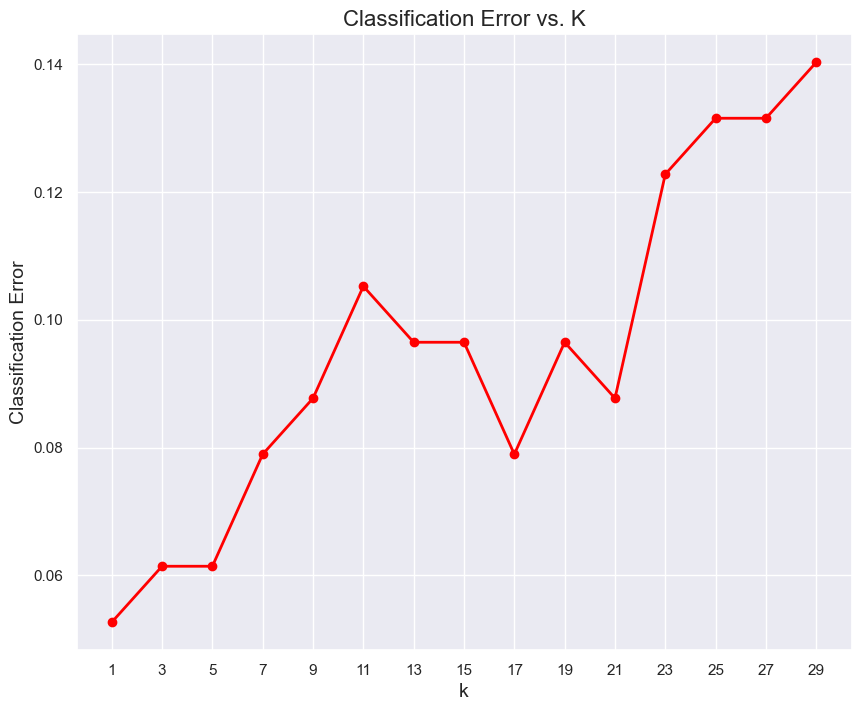

In [45]:
# Define a range of possible K values (odd numbers from 1 to 30)
possible_k = [k for k in range(1, 31, 2)]

# Compute classification errors for each K value in the defined range
errors = [classification_error_penguin(X_test,
                                       y_test,
                                       X_train,
                                       y_train,
                                       k) for k in possible_k]

# Plot the relationship between K values and classification errors
plt.figure(figsize=(10, 8))
plt.plot(possible_k, errors, color='red', marker="o", linestyle='-', linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('Classification Error', fontsize=14)
plt.xticks(possible_k)
plt.title('Classification Error vs. K', fontsize=16)
plt.grid(True)
plt.show()

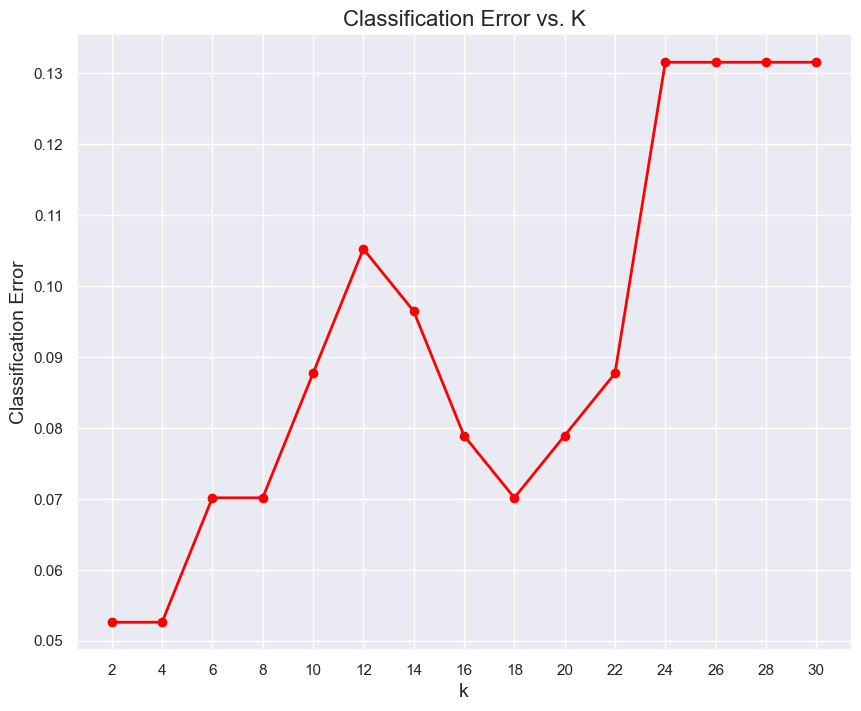

In [47]:
# Define a range of possible K values (even numbers from 2 to 30)
possible_k = [k for k in range(2, 31, 2)]

# Compute classification errors for each K value in the defined range
errors = [classification_error_penguin(X_test,
                                       y_test,
                                       X_train,
                                       y_train,
                                       k) for k in possible_k]

# Plot the relationship between K values and classification errors
plt.figure(figsize=(10, 8))
plt.plot(possible_k, errors, color='red', marker="o", linestyle='-', linewidth=2)
plt.xlabel('k', fontsize=14)
plt.ylabel('Classification Error', fontsize=14)
plt.xticks(possible_k)
plt.title('Classification Error vs. K', fontsize=16)
plt.grid(True)
plt.show()

# Conclusion

In this analysis, we explored the implementation of the k-nearest neighbors (KNN) algorithm using the penguin dataset. Beginning with data loading and visualization, we developed functions for computing KNN, predicting labels, and assessing classification errors. We highlighted the significance of choosing an optimal K value, emphasizing the trade-off between stability and accuracy in predictions. Finally, we demonstrated the process of selecting the best K value by plotting the classification error against different K values. This comprehensive exploration provides insights into the practical application and fine-tuning considerations of the KNN algorithm for the given dataset.